<a href="https://colab.research.google.com/github/khimaja/Deep-learning_code/blob/main/Madaline%20neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Madaline neural network.**

In [13]:
class Madaline:
  def __init__(self, input_neurons, output_neurons):
    self.network = []
    for i in range(input_neurons):
      self.network.append(Neuron())
    for i in range(output_neurons):
      self.network.append(Neuron())

  def predict(self, x):
    """
    Makes predictions with the Madaline neural network.

    Args:
      x: The input data.

    Returns:
      The predictions of the network.
    """

    predictions = []
    for neuron in self.network:
      prediction = np.dot(neuron.weights.T, x) + neuron.bias
      predictions.append(1 if prediction >= 0 else -1)
    return predictions

  def fit(self, X, y, epochs=10, eta=0.1):
    """
    Trains the Madaline neural network.

    Args:
      X: The input data.
      y: The desired output.
      epochs: The number of epochs to train for.
      eta: The learning rate.
    """

    for epoch in range(epochs):
      for i in range(len(X)):
        outputs = self.predict(X[i])
        error = y[i] - outputs

        # Update weights and bias for each neuron
        for j in range(len(self.network)):
          self.network[j].weights += eta * error[j] * X[i]
          self.network[j].bias += eta * error[j]


**Basic exicution **

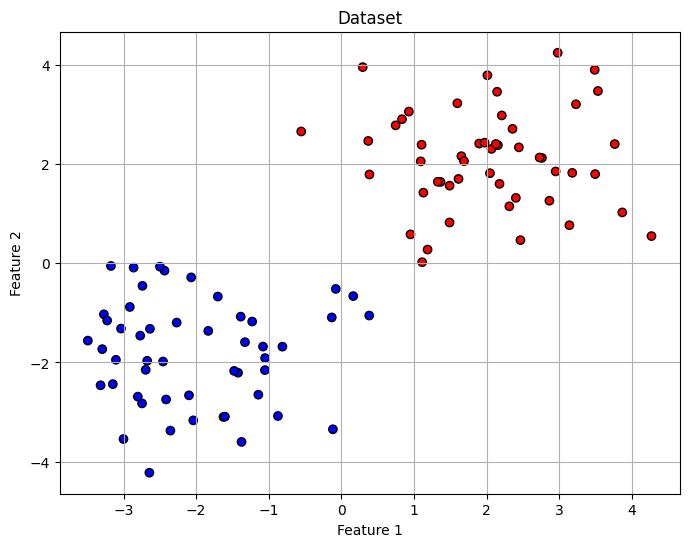

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for two classes
np.random.seed(0)
X1 = np.random.randn(50, 2) + np.array([2, 2])
X2 = np.random.randn(50, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])
y = np.array([1] * 50 + [-1] * 50)  # Class labels

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


**using wine dataset**

Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Confusion Matrix:
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]


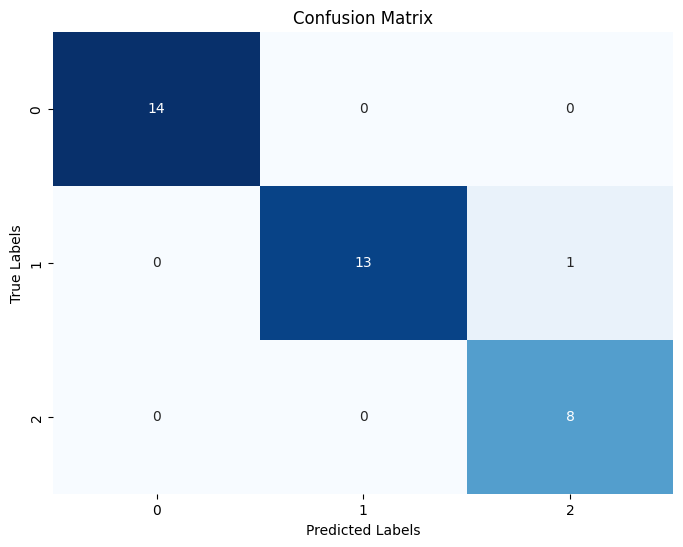

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

class Neuron:
    def __init__(self):
        self.weights = np.zeros(13)  # Wine dataset has 13 features
        self.bias = 0

class Madaline:
    def __init__(self, input_neurons, output_neurons):
        self.network = []
        for i in range(input_neurons):
            self.network.append(Neuron())
        for i in range(output_neurons):
            self.network.append(Neuron())

    def fit(self, X, y, epochs=10, eta=0.1):
        for epoch in range(epochs):
            for i in range(len(X)):
                outputs = self.predict(X[i])
                error = np.zeros(len(self.network))
                error[y[i]] = 1
                for j in range(len(self.network)):
                    self.network[j].weights += eta * error[j] * X[i]
                    self.network[j].bias += eta * error[j]

    def predict(self, x):
        predictions = []
        for neuron in self.network:
            prediction = np.dot(neuron.weights, x) + neuron.bias
            predictions.append(prediction)
        return np.argmax(predictions)

# Load the wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Madaline network
madaline = Madaline(X_train.shape[1], len(np.unique(y)))
madaline.fit(X_train, y_train, epochs=100, eta=0.1)

# Evaluate the performance on the test set
predictions = [madaline.predict(x) for x in X_test]
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Visualization of decision boundary (not applicable for high-dimensional datasets)
if X_train.shape[1] == 2:
    # Define a mesh grid to visualize decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    mesh_predictions = np.array([madaline.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    mesh_predictions = mesh_predictions.reshape(xx.shape)

    # Plot the decision boundary and the dataset
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, mesh_predictions, cmap=cmap_light, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.tab10, edgecolors='k')
    plt.title('Madaline Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

    plt.show()

from sklearn.metrics import classification_report, confusion_matrix

# Calculate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
